In [1]:
import numpy as pd
import matplotlib.pyplot as plt
import pandas as pd

In [52]:
# in m^2
area_10_1 = 5.8*1.8*10**-6
area_20_1 = 5.3*1.5*10**-6 
area_peo = 5.2*1.8*10**-6

In [79]:
ten_to_one = pd.read_csv("./group7_10to1_1.csv", header=1)
ten_to_one = ten_to_one.drop(index=0)
ten_to_one = ten_to_one.drop(columns="1")
ten_to_one = ten_to_one.reset_index(drop=True)
ten_to_one = ten_to_one.astype(float)

twenty_to_one = pd.read_csv("./Group_7_20to1_1.csv", header=1)
twenty_to_one = twenty_to_one.drop(index=0)
twenty_to_one = twenty_to_one.drop(columns="1")
twenty_to_one = twenty_to_one.reset_index(drop=True)
twenty_to_one = twenty_to_one.astype(float)

peo = pd.read_csv("./Peo_group_7.csv", header=1)
peo = peo.drop(index=0)
peo = peo.drop(columns="1")
peo = peo.reset_index(drop=True)
peo = peo.astype(float)

In [80]:
new_cols = pd.DataFrame(columns=['stress', 'strain'])
new_cols['stress'] = ten_to_one['Force'].div(area_10_1)
new_cols['stress'] = new_cols['stress'].multiply(9.81)
new_cols['stress'] = new_cols['stress'].div(1000)
new_cols['strain'] = ten_to_one['Displacement'].div(33.6)

ten_to_one = pd.concat([ten_to_one, new_cols], axis=1)

new_cols = pd.DataFrame(columns=['stress', 'strain'])
new_cols['stress'] = twenty_to_one['Force'].div(area_20_1)
new_cols['stress'] = new_cols['stress'].multiply(9.81)
new_cols['stress'] = new_cols['stress'].div(1000)
new_cols['strain'] = twenty_to_one['Displacement'].div(33.6)

twenty_to_one = pd.concat([twenty_to_one, new_cols], axis=1)

new_cols = pd.DataFrame(columns=['stress', 'strain'])
new_cols['stress'] = peo['Force'].div(area_peo)
new_cols['stress'] = new_cols['stress'].multiply(9.81)
new_cols['stress'] = new_cols['stress'].div(1000)
new_cols['strain'] = peo['Displacement'].div(34.5)

peo = pd.concat([peo, new_cols], axis=1)

In [95]:
peo

,Time,Displacement,Force,stress,strain
0,0.000,0.0000,0.4600,482.115385,0.000000
1,0.020,0.0006,0.4607,482.849038,0.000017
2,0.040,0.0094,0.4618,484.001923,0.000272
3,0.060,0.0261,0.4619,484.106731,0.000757
4,0.080,0.0406,0.4609,483.058654,0.001177
...,...,...,...,...,...
4455,89.100,59.4016,0.4567,478.656731,1.721786
4456,89.120,59.4147,0.4567,478.656731,1.722165
4457,89.140,59.4295,0.4568,478.761538,1.722594
4458,89.160,59.4403,0.4565,478.447115,1.722907


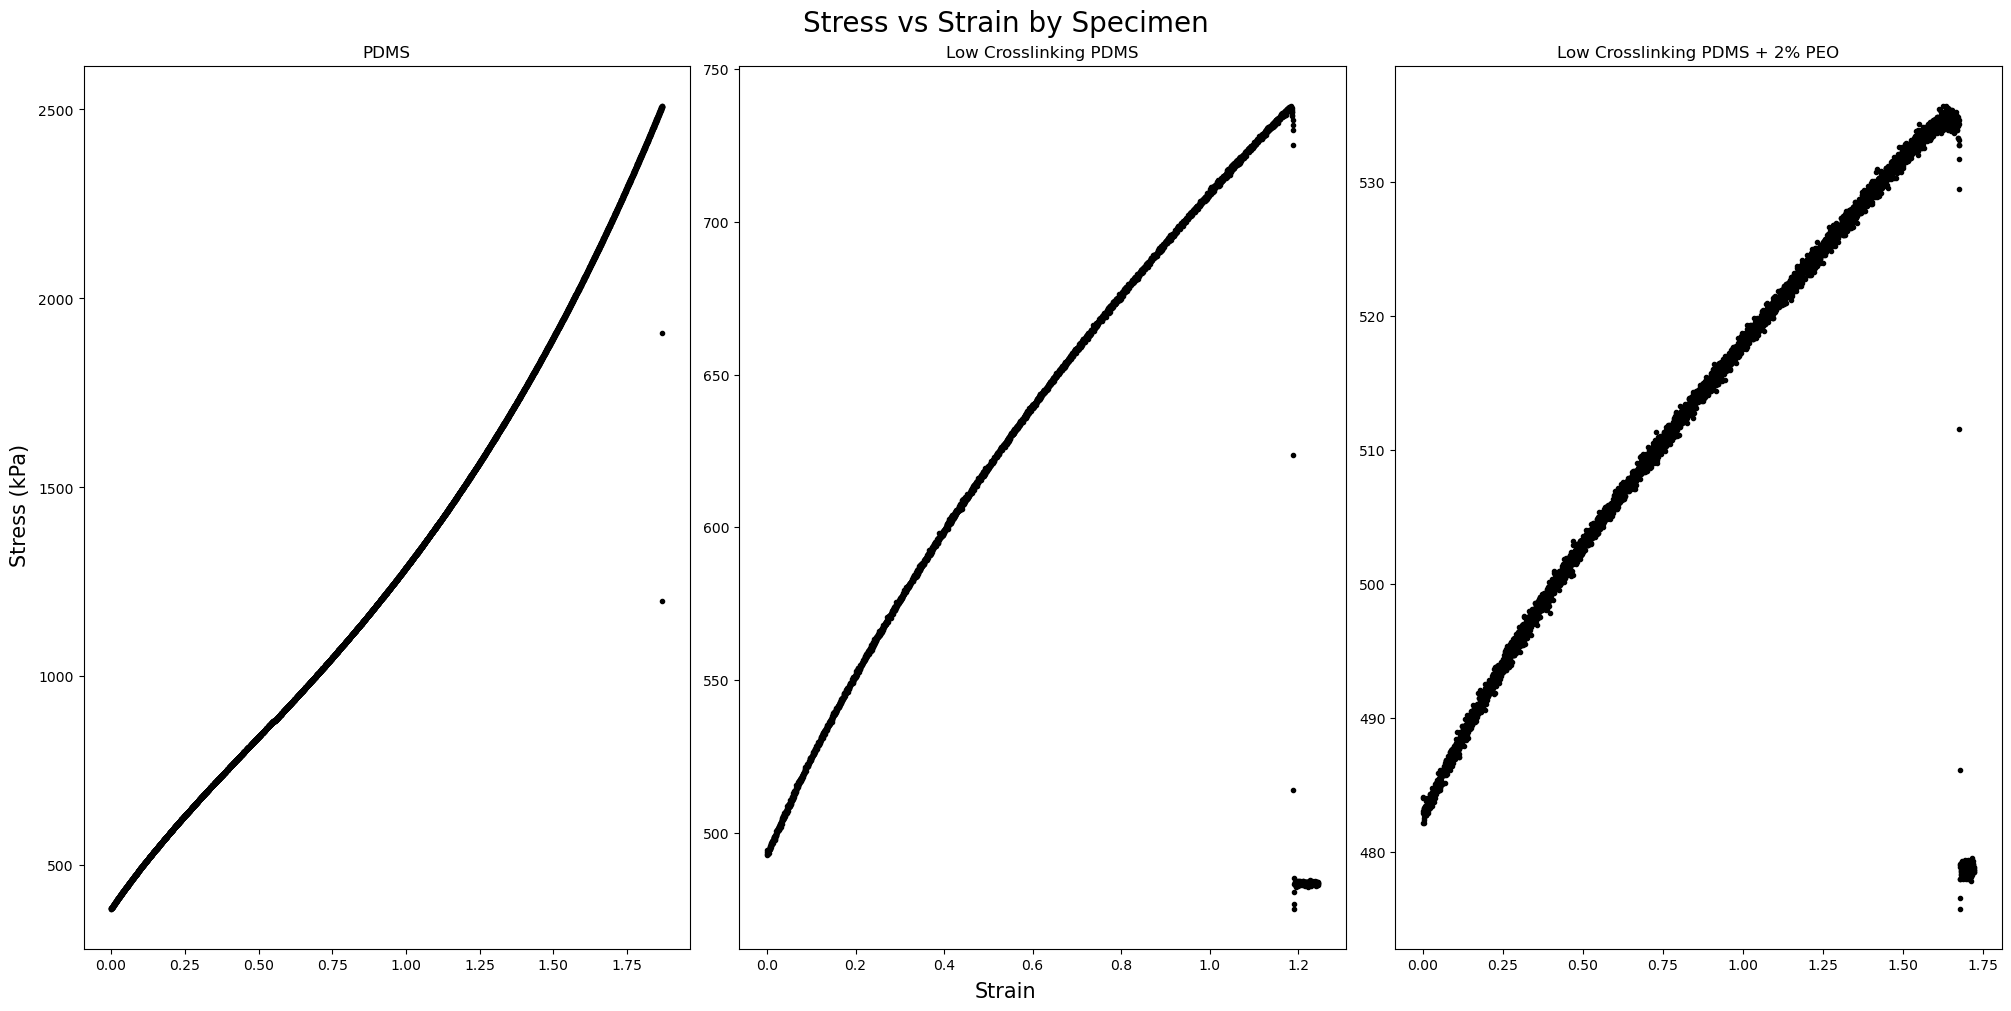

In [94]:
fig, ax = plt.subplots(nrows=1, ncols=3, layout='constrained')
ax[0].scatter(ten_to_one['strain'], ten_to_one['stress'], color='black', marker='.')
ax[0].set_title("PDMS") 
ax[1].scatter(twenty_to_one['strain'], twenty_to_one['stress'], color='black', marker='.')
ax[1].set_title("Low Crosslinking PDMS") 
ax[2].scatter(peo['strain'], peo['stress'], color='black', marker='.')
ax[2].set_title("Low Crosslinking PDMS + 2% PEO") 
fig.supxlabel('Strain', fontsize=15)
fig.supylabel("Stress (kPa)", fontsize=15)
fig.set_figwidth(20)
fig.set_figheight(10)
fig.suptitle('Stress vs Strain by Specimen', fontsize=20)
plt.show()

In [102]:
ten_to_one['Displacement'].max()

62.8095

In [103]:
twenty_to_one['Displacement'].max()

41.8512

In [104]:
peo['Displacement'].max()

59.4509